In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('ggplot')

from sklearn.metrics.cluster import homogeneity_score

In [2]:
df = pd.read_csv('Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv')

In [3]:
df.head(2)

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Elementos de aseo y limpieza,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.596922,0.031098,2.408839e-05,0.000000e+00,0.281401,0.334865,0.053464,0.669729,0.000000e+00,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.017058,0.000888,3.441947e-07,3.441947e-07,0.508366,0.604956,0.096590,0.604956,3.441947e-07,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 43 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   CATEGORÍA_Alimentos y Bebidas                          22392 non-null  float64
 1   CATEGORÍA_Almacenamiento y empaques                    22392 non-null  float64
 2   CATEGORÍA_Aseo, Cafetería y Oficina                    22392 non-null  float64
 3   CATEGORÍA_Dotación y elementos de protección personal  22392 non-null  float64
 4   CATEGORÍA_Ferreteria                                   22392 non-null  float64
 5   CATEGORÍA_Otros                                        22392 non-null  float64
 6   CATEGORÍA_Vehículos y repuestos                        22392 non-null  float64
 7   CATEGORÍA_Vigilancia y seguridad industrial            22392 non-null  float64
 8   SUBCATEGORÍA_Alimentos preparados y conservado

## DROP SOME COLUMNS

In [5]:
cols_to_drop = ['DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN', 'PRECIO_UNITARIO_+_IVA', 
                'PRESUPUESTO_Otros', 'PRESUPUESTO_Presupuesto 711', 'PRESUPUESTO_Presupuesto 719', 
                'SUBCATEGORÍA_Alimentos preparados y conservados', 'SUBCATEGORÍA_Elementos de aseo y limpieza', 'SUBCATEGORÍA_Otros'
               ]

In [6]:
cols_to_drop

['DURACIÓN_ENTREGA',
 'DURACIÓN_APROBACIÓN',
 'PRECIO_UNITARIO_+_IVA',
 'PRESUPUESTO_Otros',
 'PRESUPUESTO_Presupuesto 711',
 'PRESUPUESTO_Presupuesto 719',
 'SUBCATEGORÍA_Alimentos preparados y conservados',
 'SUBCATEGORÍA_Elementos de aseo y limpieza',
 'SUBCATEGORÍA_Otros']

In [7]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 34 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   CATEGORÍA_Alimentos y Bebidas                          22392 non-null  float64
 1   CATEGORÍA_Almacenamiento y empaques                    22392 non-null  float64
 2   CATEGORÍA_Aseo, Cafetería y Oficina                    22392 non-null  float64
 3   CATEGORÍA_Dotación y elementos de protección personal  22392 non-null  float64
 4   CATEGORÍA_Ferreteria                                   22392 non-null  float64
 5   CATEGORÍA_Otros                                        22392 non-null  float64
 6   CATEGORÍA_Vehículos y repuestos                        22392 non-null  float64
 7   CATEGORÍA_Vigilancia y seguridad industrial            22392 non-null  float64
 8   SUBCATEGORÍA_Seguridad y protección personal  

In [9]:
df.head(3)

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,...,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_+_IVA
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.596922,0.031098,2.408839e-05,0.000000e+00,0.281401,0.053464,0.669729
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.017058,0.000888,3.441947e-07,3.441947e-07,0.508366,0.096590,0.604956
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.301784,0.015711,6.089387e-05,0.000000e+00,0.094386,0.000000,0.943855


# CLUSTERING

In [10]:
from sklearn import metrics
from sklearn.cluster import KMeans

## ELBOW METHOD

In [11]:
wcss = []
for i in range (1, 18):
    kmeans = KMeans(n_clusters=i, max_iter=200)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Clustering score')

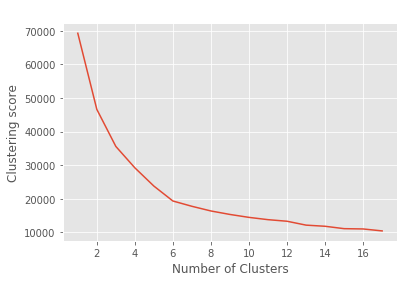

In [12]:
plt.plot(range(1,18), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering score')

## CREATE THE CLUSTER WITH OPTIMAL N_CLUSTER

In [13]:
clustering = KMeans(n_clusters=6, max_iter=300)
clustering.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
df.head()

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,...,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_+_IVA
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.596922,0.031098,2.408839e-05,0.000000e+00,0.281401,0.053464,0.669729
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.017058,0.000888,3.441947e-07,3.441947e-07,0.508366,0.096590,0.604956
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.301784,0.015711,6.089387e-05,0.000000e+00,0.094386,0.000000,0.943855
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.044989,0.001718,4.539030e-05,0.000000e+00,0.019972,0.000000,0.998587
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.063367,0.000001,8.950629e-06,8.950629e-06,0.117744,0.022371,0.980810


## CLUSTER CENTERS

Data Frame of 4 clusters with normalized data

In [15]:
df_centroids = pd.DataFrame(clustering.cluster_centers_, columns=df.columns)
df_centroids

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,...,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_+_IVA
0,9.888856e-01,-1.207368e-15,1.111445e-02,2.435552e-15,-2.088607e-15,-3.483325e-15,-1.075529e-15,2.275957e-14,-7.327472e-15,1.000000e+00,...,3.003905e-03,0.000601,5.212844e-16,0.019304,0.008881,0.005001,3.881847e-07,0.013448,0.002282,0.993243
1,6.729475e-04,-1.495332e-15,9.966353e-01,2.359224e-15,-1.706968e-15,2.691790e-03,-8.361367e-16,1.887379e-14,-7.105427e-15,8.411844e-03,...,4.037685e-03,0.680013,4.865899e-16,0.802368,0.016554,0.000064,4.570575e-05,0.142523,0.015600,0.350553
2,1.809664e-14,7.251144e-16,5.495604e-15,-7.702172e-16,-3.302913e-15,-3.816392e-15,1.595946e-16,1.000000e+00,1.000000e+00,1.754152e-14,...,2.428613e-16,1.000000,6.323067e-16,0.185209,0.002140,0.000083,8.338017e-05,0.117271,0.022282,0.904897
3,1.436782e-01,5.064655e-02,1.864224e-01,3.135776e-01,1.005747e-02,2.514368e-01,2.442529e-02,1.975575e-02,1.975575e-02,9.931753e-01,...,9.698276e-03,0.278376,4.561782e-02,0.247981,0.006331,0.000560,7.314964e-05,0.192283,0.030868,0.782656
4,3.130308e-02,2.353798e-02,1.164766e-02,6.745935e-02,1.849066e-01,4.763407e-01,7.255521e-02,1.322495e-01,1.312788e-01,9.987867e-01,...,4.853191e-04,0.800777,8.493084e-03,0.470404,0.012077,0.000460,4.391741e-04,0.220935,0.033579,0.622422
5,8.313317e-01,5.978116e-02,7.259141e-02,1.281025e-02,-2.435552e-15,2.081665e-02,-1.297573e-15,2.668802e-03,2.668802e-03,1.000000e+00,...,-1.301043e-17,0.708567,2.668802e-04,0.441301,0.008721,0.000236,1.771784e-04,0.149705,0.017026,0.718377


# DF WITH LABELS OF CLUSTER

In [16]:
df['KMeans_Cluster'] = clustering.labels_
df.sample(n=7)

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,...,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_+_IVA,KMeans_Cluster
11801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.343446,0.001394,0.000015,0.000015,0.329654,0.062634,0.784576,4
13308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.074859,0.001927,0.000013,0.000013,0.117651,0.022353,0.980025,2
11059,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.472584,0.004459,0.000021,0.000021,0.309332,0.058772,0.736209,5
3796,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.851743,0.003250,0.000018,0.000018,0.266397,0.050615,0.317013,3
15083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.296467,0.003399,0.000017,0.000017,0.335223,0.063688,0.797831,2
9563,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.880426,0.006158,0.000019,0.000000,0.241073,0.045805,0.286877,3
14552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.016678,0.000264,0.000029,0.000029,0.014000,0.002660,0.999620,2


In [18]:
df_original = pd.read_excel('Proveindustriales_completo.xlsx')

In [19]:
df_original['KMeans_Cluster'] = clustering.labels_
df_original_plus_clusters = df_original
df_original.sample(n=7)

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,PRESUPUESTO,COMPAÑÍA_COMPRADORA,ESTADO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,FECHA_ÚLTIMO_MOVIMIENTO,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN,KMeans_Cluster
17781,31672,49,Vigilancia y seguridad industrial,Seguridad y protección personal,Proveedor 301,Otros,Portal comprador 24,Recibido,4.0,4.0,28571,34000,5429,135999,2020-01-24,0.0,59.0,2
6603,47103,1135,"Aseo, Cafetería y Oficina",Elementos de aseo y limpieza,Proveedor 59,Otros,Portal comprador 1,Finalizado Incompleto,4.0,4.0,2350,2350,0,9400,2021-05-18,3.0,0.0,1
1091,49098,2275,Almacenamiento y empaques,Otros,Otros,Otros,Portal comprador 1,Recibido,1.0,1.0,80000,95200,15200,95200,2021-10-23,3.0,1.0,4
12160,45200,54,Alimentos y Bebidas,Otros,Otros,Presupuesto 711,Portal comprador 2,Recibido,6.0,6.0,17060,20301,3241,121806,2020-08-19,1.0,0.0,5
3458,48115,1659,"Aseo, Cafetería y Oficina",Otros,Proveedor 28,Otros,Portal comprador 1,Recibido,1.0,1.0,4900,5831,931,5831,2021-08-03,8.0,0.0,1
3398,48130,1671,Dotación y elementos de protección personal,Otros,Otros,Otros,Portal comprador 1,Orden en Proceso,10.0,0.0,1900,1900,0,19000,2021-07-28,0.0,1.0,4
13591,38442,843,Vigilancia y seguridad industrial,Seguridad y protección personal,Proveedor 301,Otros,Portal comprador 24,Recibido,32.0,32.0,86555,103000,16445,3295999,2020-02-13,0.0,16.0,2


In [20]:
df_original_plus_clusters.to_excel('Proveindustriales_completo_y_clusters.xlsx', index=False)

## DESCRIPTION OF THE CLUSTERS

In [21]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:20,.2f}'.format

In [22]:
df.groupby('KMeans_Cluster').sum()

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_+_IVA
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,"3,292.00",0.00,37.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,329.00",0.00,0.00,0.00,0.00,9.00,0.00,0.00,"3,320.00",0.00,0.00,0.00,0.00,9.00,"3,308.00",10.00,2.00,0.00,64.26,29.56,16.65,0.00,44.77,7.60,"3,306.51"
1,2.00,0.00,"2,962.00",0.00,0.00,8.00,0.00,0.00,0.00,25.00,"1,406.00",0.00,"1,541.00",423.00,"2,433.00",116.00,0.00,0.00,169.00,0.00,381.00,0.00,226.00,163.00,12.00,"2,021.00",0.00,"2,384.64",49.20,0.19,0.14,423.58,46.36,"1,041.84"
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"5,439.00","5,439.00",0.00,0.00,"5,439.00",0.00,0.00,0.00,0.00,"5,439.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"5,439.00",0.00,"1,007.35",11.64,0.45,0.45,637.84,121.19,"4,921.74"
3,400.00,141.00,519.00,873.00,28.00,700.00,68.00,55.00,55.00,"2,765.00",8.00,0.00,11.00,"2,784.00",0.00,0.00,0.00,0.00,212.00,12.00,79.00,15.00,330.00,"1,207.00",27.00,775.00,127.00,690.38,17.63,1.56,0.20,535.32,85.94,"2,178.91"
4,129.00,97.00,48.00,278.00,762.00,"1,963.00",299.00,545.00,541.00,"4,116.00",5.00,0.00,0.00,0.00,"4,121.00",0.00,0.00,0.00,290.00,0.00,144.00,0.00,168.00,182.00,2.00,"3,300.00",35.00,"1,938.54",49.77,1.90,1.81,910.47,138.38,"2,565.00"
5,"3,115.00",224.00,272.00,48.00,0.00,78.00,0.00,10.00,10.00,"3,747.00",0.00,0.00,0.00,0.00,0.00,"3,747.00",0.00,0.00,468.00,0.00,332.00,0.00,279.00,12.00,0.00,"2,655.00",1.00,"1,653.55",32.68,0.88,0.66,560.95,63.80,"2,691.76"


## PCA TO TAKE A LOOK OF THE CLUSTER

In [23]:
from sklearn.decomposition import  PCA

In [24]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_fit, columns=['Component_1', 'Component_2'])
pca_nombres = pd.concat([pca_df, df[['KMeans_Cluster']]], axis=1)

pca_nombres

,Component_1,Component_2,KMeans_Cluster
0,-1.42,-0.75,4
1,-1.60,-0.19,4
2,2.47,-1.21,0
3,-2.36,-0.91,5
4,-0.60,-0.28,3
...,...,...,...
22387,-0.49,-0.28,3
22388,-0.51,-0.29,3
22389,-0.60,-0.28,3
22390,-0.60,-0.28,3


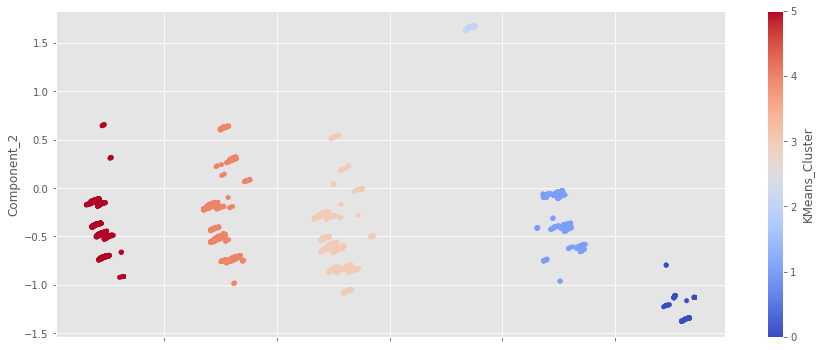

In [25]:
pca_nombres.plot.scatter(x='Component_1', y='Component_2', c='KMeans_Cluster',cmap='coolwarm', figsize=(15, 6))

In [26]:
px.scatter(pca_nombres, x="Component_1", y="Component_2", color="KMeans_Cluster", color_continuous_scale=px.colors.sequential.Viridis)